# Project Team ID : "PTID-CDS-JUL-23-1577"

# Team members
- Dhaya thilak bharathi p (dhayathilak96@gmail.com)
- Jeju (chinthaparthijeju123@gmail.com)

# Project ID: PRCP-1001-RiceLeaf

## Problem statement:
 - Create a model to analyse the three types of diseses in the rice leaf namely bacterial ,leaf smut and brown spot

## Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

## Load the dataset

In [2]:
directory = 'C:\\Users\\dhaya\\project\\PRCP-1001-RiceLeaf\\Data'

In [3]:
data = tf.keras.utils.image_dataset_from_directory(directory,
                                                   labels='inferred',label_mode='int',class_names=None,
                                                   color_mode='rgb',batch_size=None,image_size=(224,224),
                                                   shuffle=True,seed=1)

Found 119 files belonging to 3 classes.


## Domain analysis:

- Rice is one of the most important staple crops worldwide, providing sustenance to over half of the world's population. However, rice plants are vulnerable to several diseases that can severely impact the yield and quality of rice production. Some of the major rice diseases that affect rice plants include bacterial leaf blight, brown spot, and leaf smut.


- Bacterial leaf blight : Primarily the plant is light green to greyish green and water-soaked streaks appear on the leaves but once it gets affected by the bacterial blight, they form larger yellowish lesions with uneven edges. Further, the leaves become yellow, gradually wilt and die.
 
- Brown spot: Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf.
 
- Leaf smut: a widely distributed ,but somewhat minor,disease of rice. *The fungus produces slightly raised,angular ,black spots(sori)on both sides of leaves.

In [4]:
# printing the class names
class_names = data.class_names
print(class_names)

['Bacterial leaf blight-20200814T055237Z-001', 'Brown spot-20200814T055208Z-001', 'Leaf smut-20200814T055530Z-001']


## Display images

In [5]:
def show_images(images, labels):
    fig, axes = plt.subplots(8, 4, figsize=(10, 10))
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.numpy().astype("uint8"))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

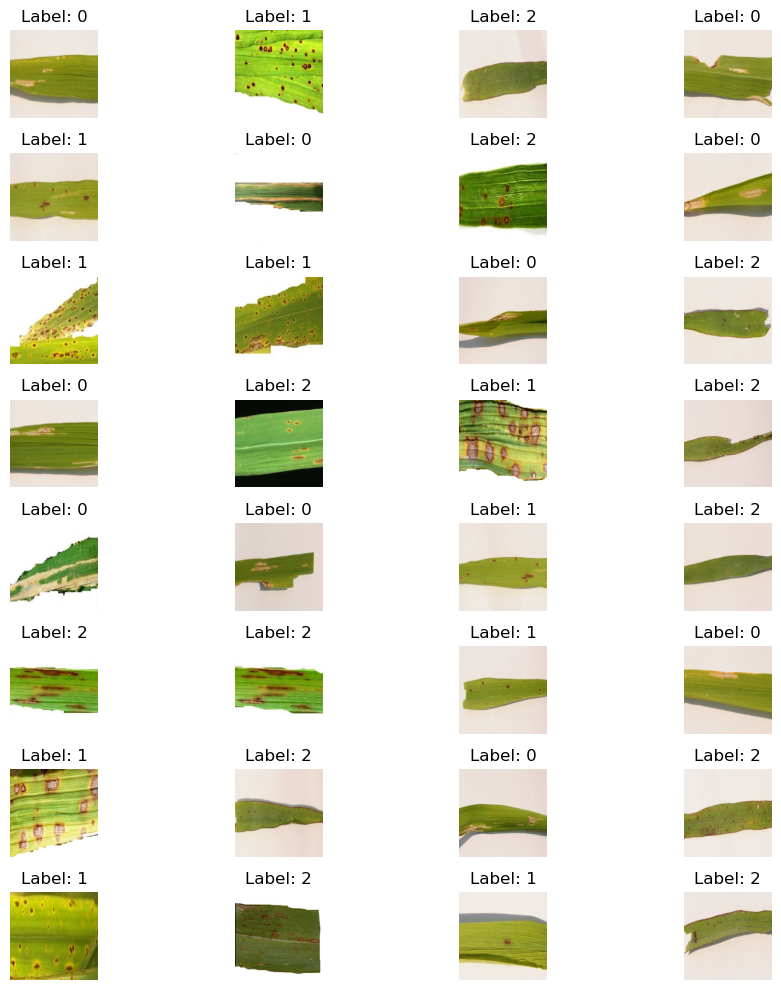

In [6]:
#displaying image batch of 32
batched_ds = data.batch(32)

batch = next(iter(batched_ds))
images, labels = batch

images, labels = next(iter(batched_ds))
show_images(images, labels)

- Label0: Bacterial leaf blight
- Label1: Brown spot
- Label2: Leaf smut

## Creation of input  and output variables

In [7]:
x=[]
Y=[]

for img,labels in data.batch(32):
    for img,lab in zip(img,labels):
        x.append(img)
        Y.append(lab.numpy())

In [8]:
x= np.array(x)
Y = np.array(Y)

## train, test split of data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state=2)

In [11]:
x_train.shape

(89, 224, 224, 3)

In [12]:
x_test.shape

(30, 224, 224, 3)

## Normalization of input variables

In [13]:
x_train = x_train/255
x_test = x_test/255

## Scaling of Output variables

In [14]:
import keras
y_train = keras.utils.to_categorical(y_train,num_classes=len(class_names))

In [15]:
y_test = keras.utils.to_categorical(y_test,num_classes=len(class_names))

## Building the Convolution layer

In [16]:
model = Sequential()

In [17]:
# first convolution layer
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())

In [18]:
#second layer
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())

In [19]:
# third layer
model.add(Conv2D(filters=48,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())

In [20]:
#flatten the layer
model.add(Flatten())

In [21]:
#add dense layer with relu
model.add(Dense(200,activation='relu'))

In [22]:

# dense layer with softmax
model.add(Dense(3,activation='softmax'))

In [23]:
#get the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 48)        0

## Compile the model

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

## Adding checkpoint to the model

In [25]:
from keras.callbacks import ModelCheckpoint

In [26]:
checkpoint = ModelCheckpoint(filepath='model.hdf5',verbose=3,save_best_only=True)

## Fit the model

In [27]:
model.fit(x_train,y_train,batch_size=3,epochs=30,validation_data=(x_test,y_test),callbacks=[checkpoint],verbose=2,shuffle=True)

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.02154, saving model to model.hdf5


D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 - 12s - loss: 1.3900 - accuracy: 0.3933 - val_loss: 1.0215 - val_accuracy: 0.6333 - 12s/epoch - 394ms/step
Epoch 2/30

Epoch 2: val_loss improved from 1.02154 to 0.91260, saving model to model.hdf5
30/30 - 10s - loss: 1.0709 - accuracy: 0.4270 - val_loss: 0.9126 - val_accuracy: 0.7000 - 10s/epoch - 329ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.91260 to 0.85887, saving model to model.hdf5
30/30 - 10s - loss: 1.0088 - accuracy: 0.4270 - val_loss: 0.8589 - val_accuracy: 0.6000 - 10s/epoch - 337ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.85887 to 0.79887, saving model to model.hdf5
30/30 - 10s - loss: 0.9663 - accuracy: 0.5393 - val_loss: 0.7989 - val_accuracy: 0.6000 - 10s/epoch - 326ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 0.79887
30/30 - 10s - loss: 0.8726 - accuracy: 0.5730 - val_loss: 0.8212 - val_accuracy: 0.7000 - 10s/epoch - 332ms/step
Epoch 6/30

Epoch 6: val_loss improved from 0.79887 to 0.65269, saving model to model.hdf5
30/30 - 10s 

- only 73% accuracy  on using 30 epochs to train the data with cnn

- 73% accuracy on using 50 epochs to train_data with cnn

In [41]:
model.fit(x_train,y_train,batch_size=3,epochs=50,validation_data=(x_test,y_test),callbacks=[checkpoint],verbose=2,shuffle=True)

Epoch 1/50

Epoch 1: val_loss did not improve from 0.54832
30/30 - 4s - loss: 2.1991e-04 - accuracy: 1.0000 - val_loss: 1.4439 - val_accuracy: 0.7333 - 4s/epoch - 122ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.54832
30/30 - 3s - loss: 1.9182e-04 - accuracy: 1.0000 - val_loss: 1.4732 - val_accuracy: 0.7333 - 3s/epoch - 117ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.54832
30/30 - 4s - loss: 1.8423e-04 - accuracy: 1.0000 - val_loss: 1.4750 - val_accuracy: 0.7333 - 4s/epoch - 117ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.54832
30/30 - 3s - loss: 1.5435e-04 - accuracy: 1.0000 - val_loss: 1.4995 - val_accuracy: 0.7333 - 3s/epoch - 116ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.54832
30/30 - 3s - loss: 1.3411e-04 - accuracy: 1.0000 - val_loss: 1.5207 - val_accuracy: 0.7333 - 3s/epoch - 115ms/step
Epoch 6/50

Epoch 6: val_loss did not improve from 0.54832
30/30 - 3s - loss: 1.1966e-04 - accuracy: 1.0000 - val_loss: 1.5301 - v

Epoch 48/50

Epoch 48: val_loss did not improve from 0.54832
30/30 - 4s - loss: 8.9070e-06 - accuracy: 1.0000 - val_loss: 1.9530 - val_accuracy: 0.7333 - 4s/epoch - 118ms/step
Epoch 49/50

Epoch 49: val_loss did not improve from 0.54832
30/30 - 3s - loss: 8.7195e-06 - accuracy: 1.0000 - val_loss: 1.9746 - val_accuracy: 0.7333 - 3s/epoch - 115ms/step
Epoch 50/50

Epoch 50: val_loss did not improve from 0.54832
30/30 - 3s - loss: 8.6686e-06 - accuracy: 1.0000 - val_loss: 1.9784 - val_accuracy: 0.7333 - 3s/epoch - 116ms/step


In [42]:
y_hat = model.predict(x_test)

1/1 [==============================] - 0s 157ms/step


In [43]:
labels = data.class_names

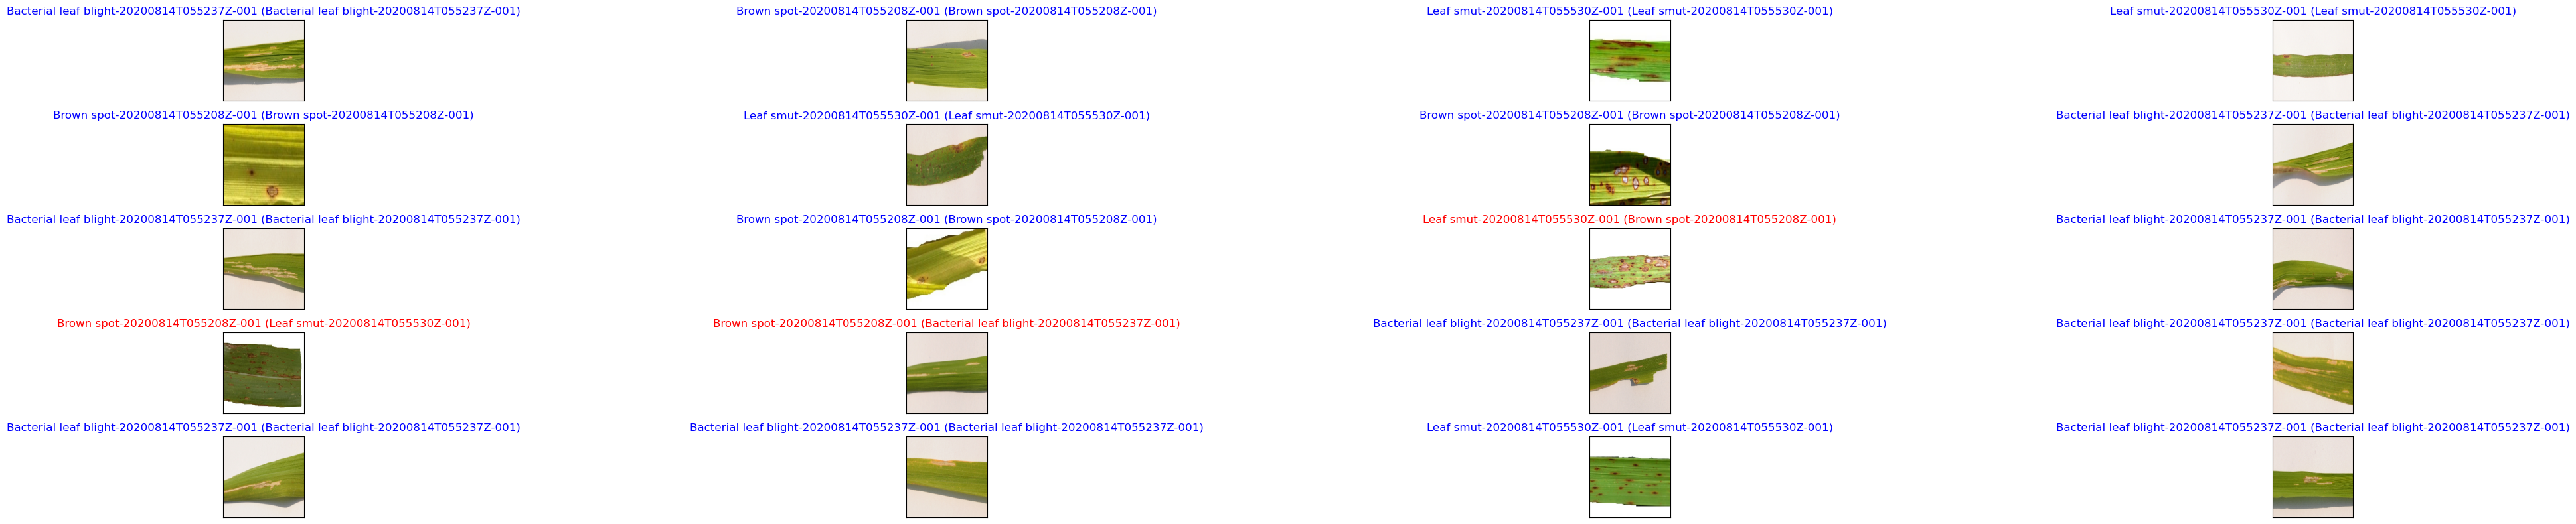

In [44]:
fig = plt.figure(figsize=(60, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))
    plt.tight_layout()